# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
import os
import cv2

# Read images and made dataframe of paths and labels

In [3]:
input_path = []
label = []
import re

for class_name in os.listdir("E:/Data Science/Datasets/cats and dogs/"):
    for path in os.listdir("E:/Data Science/Datasets/cats and dogs/"+class_name):
        if class_name == "Cat":
            label.append(0)
        else:
            label.append(1)
        a = os.path.join("E:/Data Science/Datasets/cats and dogs/",str(class_name)+"/",str(path))
        input_path.append(a)

## Create Dataset of path and label

In [5]:
A = pd.DataFrame([input_path,label]).T

In [6]:
A.columns = ["input_path","label"]

In [7]:
A.head()

,input_path,label
0,E:/Data Science/Datasets/cats and dogs/Cat/cat...,0
1,E:/Data Science/Datasets/cats and dogs/Cat/cat...,0
2,E:/Data Science/Datasets/cats and dogs/Cat/cat...,0
3,E:/Data Science/Datasets/cats and dogs/Cat/cat...,0
4,E:/Data Science/Datasets/cats and dogs/Cat/cat...,0


<Axes: xlabel='label', ylabel='count'>

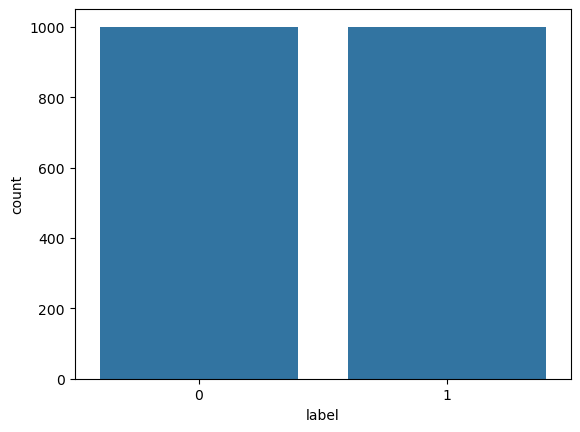

In [8]:
import seaborn as sb
sb.countplot(x=A["label"])

## Resizing images

In [10]:
data = []
for i in A["input_path"]:
    img_arr = cv2.imread(str(i))
    img_arr = cv2.resize(img_arr,(100,100))
    data.append(img_arr)

In [11]:
data[4].shape

(100, 100, 3)

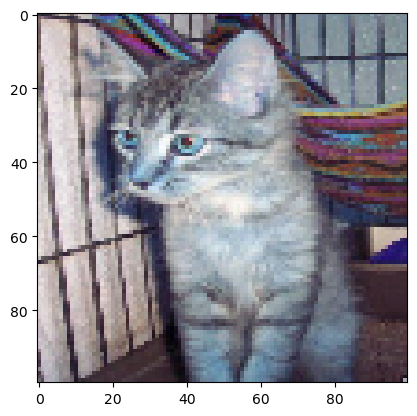

In [12]:
plt.imshow(data[112],cmap=plt.cm.binary)

In [13]:
type(data[23])

numpy.ndarray

In [14]:
data[23].shape

(100, 100, 3)

## Declare variable X and Y

In [16]:
X = np.array(data)

In [17]:
from tensorflow.keras.utils import to_categorical
Y = to_categorical(label)

In [18]:
Y.shape

(2000, 2)

In [19]:
X = X/200

## Divide X and Y into training and testing

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=21,test_size=0.2)

In [22]:
xtrain.shape

(1600, 100, 100, 3)

In [23]:
xtest.shape

(400, 100, 100, 3)

## Creating CNN Model

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
nn = Sequential()

nn.add(Convolution2D(filters=16,kernel_size=(3,3),input_shape=(100,100,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.3))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.3))

nn.add(Flatten())
nn.add(Dense(units=128,activation="relu"))
nn.add(Dense(units=64,activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(units=2,activation="sigmoid"))

In [47]:
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
nn.fit(xtrain,ytrain,batch_size=64,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 266ms/step - accuracy: 0.5536 - loss: 1.3367 - val_accuracy: 0.5400 - val_loss: 0.7285
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.7058 - loss: 0.6639 - val_accuracy: 0.5200 - val_loss: 0.7303
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.7415 - loss: 0.5445 - val_accuracy: 0.6400 - val_loss: 0.6351
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.8340 - loss: 0.3650 - val_accuracy: 0.5525 - val_loss: 0.7288
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 0.8644 - loss: 0.2873 - val_accuracy: 0.4975 - val_loss: 1.3942
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.9262 - loss: 0.1934 - val_accuracy: 0.6375 - val_loss: 0.6301
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.9342 - loss: 0.1738 - val_accuracy: 0.6625 - val_loss: 0.6275
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.9593 - loss: 0.1282 - val_accuracy: 0

In [49]:
nn.evaluate(xtest,ytest,batch_size=64)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6955 - loss: 1.8341


[1.800449013710022, 0.6974999904632568]

## Predicting Cat or Dog

In [52]:
from numpy import argmax
pred = nn.predict(xtest)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [54]:
xtest.shape

(400, 100, 100, 3)

In [56]:
pred = argmax(pred,axis=1)

In [58]:
result = []
for i in pred:
    if i == 0:
        result.append("Cat")
    else:
        result.append("Dog")

--------------------------------
Predicted result -  Cat
--------------------------------


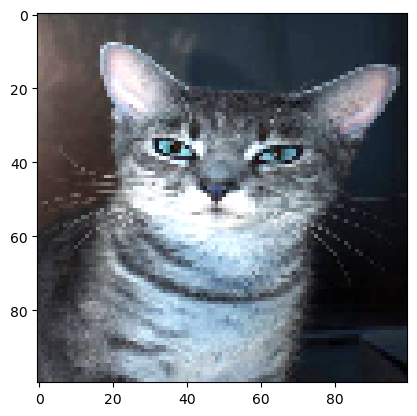

--------------------------------
Predicted result -  Dog
--------------------------------


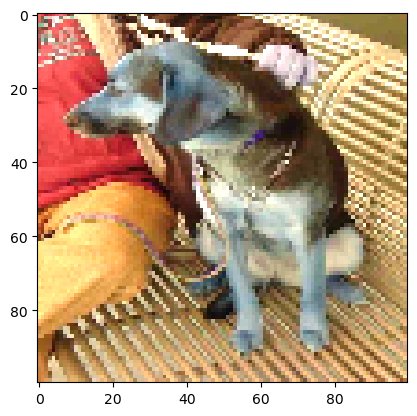

--------------------------------
Predicted result -  Dog
--------------------------------


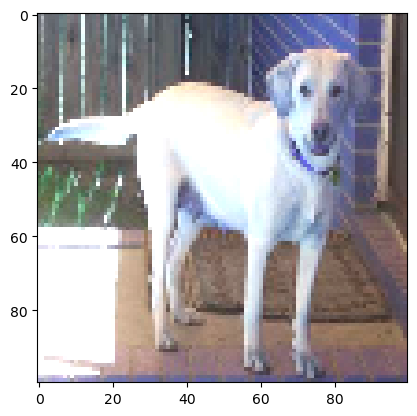

--------------------------------
Predicted result -  Dog
--------------------------------


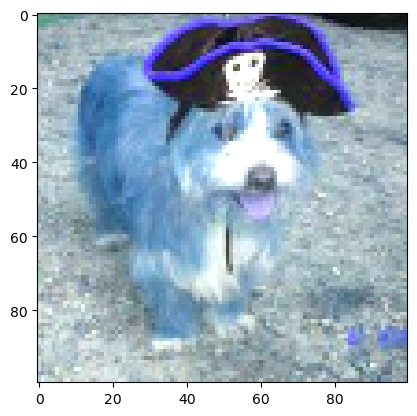

--------------------------------
Predicted result -  Cat
--------------------------------


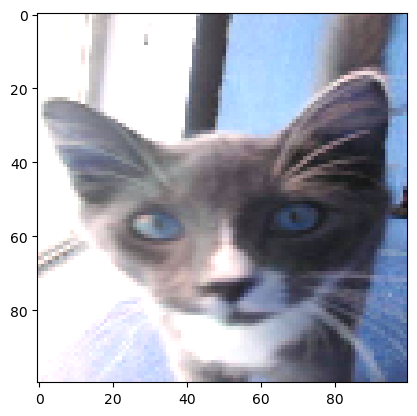

--------------------------------
Predicted result -  Dog
--------------------------------


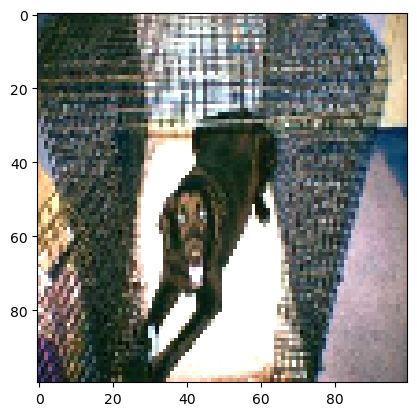

--------------------------------
Predicted result -  Cat
--------------------------------


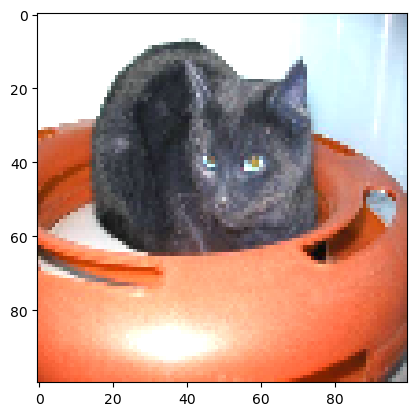

--------------------------------
Predicted result -  Dog
--------------------------------


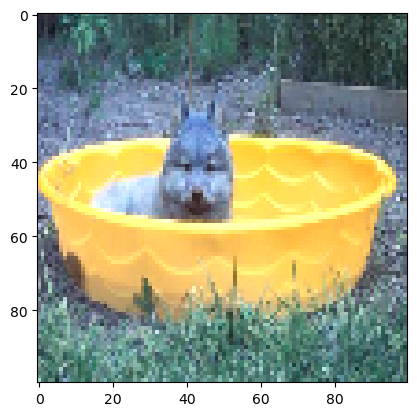

--------------------------------
Predicted result -  Cat
--------------------------------


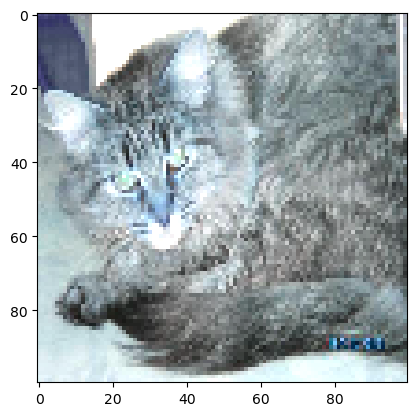

--------------------------------
Predicted result -  Cat
--------------------------------


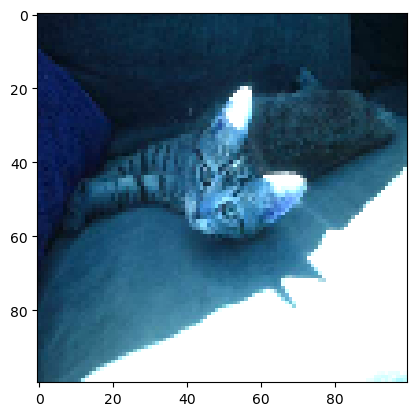

--------------------------------
Predicted result -  Cat
--------------------------------


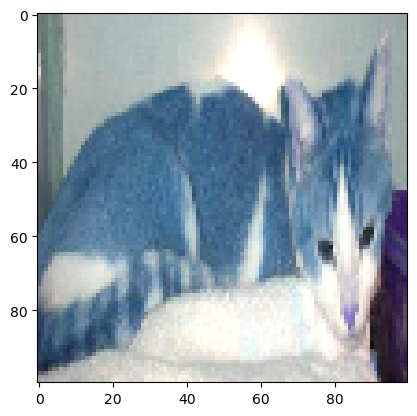

--------------------------------
Predicted result -  Cat
--------------------------------


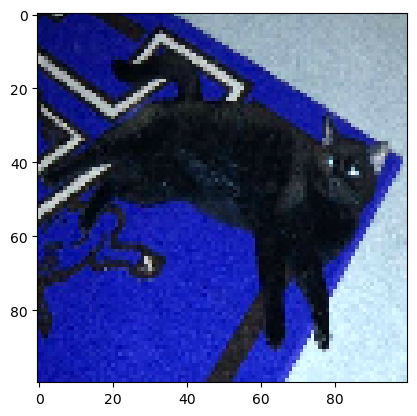

--------------------------------
Predicted result -  Cat
--------------------------------


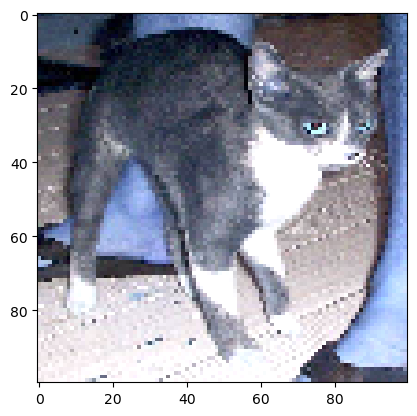

--------------------------------
Predicted result -  Cat
--------------------------------


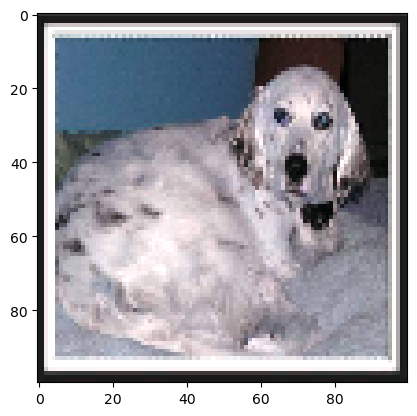

--------------------------------
Predicted result -  Cat
--------------------------------


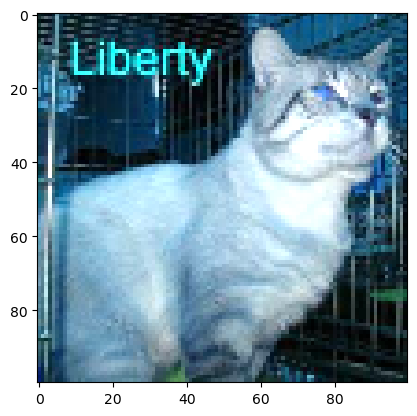

--------------------------------
Predicted result -  Cat
--------------------------------


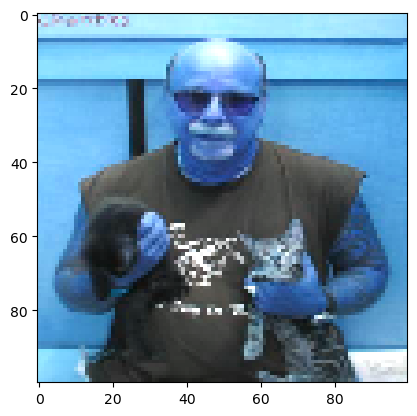

--------------------------------
Predicted result -  Dog
--------------------------------


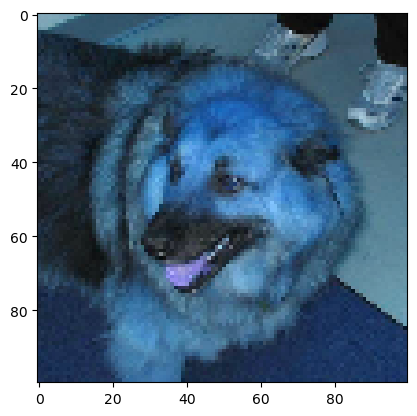

--------------------------------
Predicted result -  Cat
--------------------------------


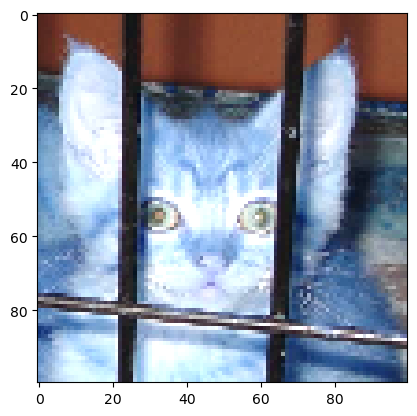

--------------------------------
Predicted result -  Dog
--------------------------------


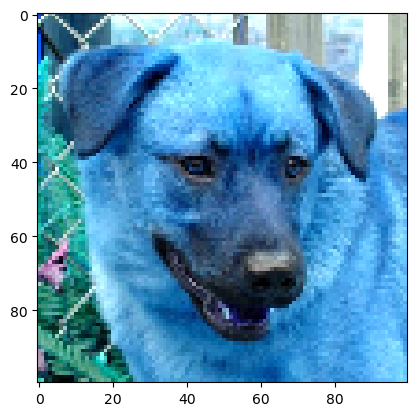

--------------------------------
Predicted result -  Dog
--------------------------------


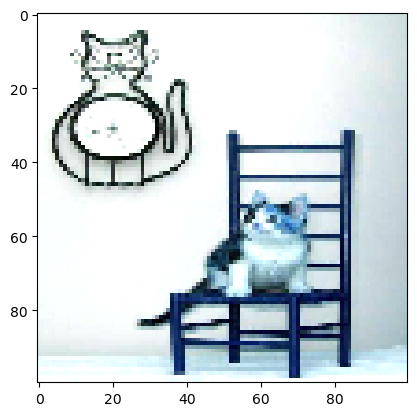

In [60]:
for i in range(0,20,1):
    print("--------------------------------")
    print("Predicted result - ",result[i])
    print("--------------------------------")
    image = xtest[i]
    image = np.clip(image, 0, 1)
    plt.imshow(image,cmap=plt.cm.binary)
    plt.show()